In [78]:
import pandas as pd
import datetime as dt
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as stock_web

start = dt.datetime(2014, 7, 30)
end = dt.datetime(2019, 7, 30)

ibm_stock = stock_web.DataReader("IBM", "quandl", start, end).iloc[::-1]
google_stock = stock_web.DataReader("GOOG", "quandl", start, end).iloc[::-1]
facebook_stock = stock_web.DataReader("FB", "quandl", start, end).iloc[::-1]
walmart_stock = stock_web.DataReader("WMT", "quandl", start, end).iloc[::-1]
tableau_stock = stock_web.DataReader("DATA", "quandl", start, end).iloc[::-1]
amazon_stock = stock_web.DataReader("AMZN", "quandl", start, end).iloc[::-1]
americanexpress_stock = stock_web.DataReader("AXP", "quandl", start, end).iloc[::-1]
microsoft_stock = stock_web.DataReader("MSFT", "quandl", start, end).iloc[::-1]
apple_stock = stock_web.DataReader("AAP", "quandl", start, end).iloc[::-1]
mastercard_stock = stock_web.DataReader("MA", "quandl", start, end).iloc[::-1]
chase_stock = stock_web.DataReader("CCF", "quandl", start, end).iloc[::-1]
# stock_df.head(5)

In [87]:
print(apple_stock.tail(5).iloc[:, 0:5])
print(facebook_stock.tail(5).iloc[:, 0:5])

              Open    High       Low   Close     Volume
Date                                                   
2018-03-21  114.66  116.29  114.2397  115.24   689137.0
2018-03-22  114.02  115.14  111.6300  111.71  1038170.0
2018-03-23  112.41  113.26  110.3400  110.84  1081320.0
2018-03-26  112.49  115.07  111.8750  114.77  1007919.0
2018-03-27  114.58  117.45  113.2900  115.01  1402702.0
              Open    High     Low   Close       Volume
Date                                                   
2018-03-21  164.80  173.40  163.30  169.39  105350867.0
2018-03-22  166.13  170.27  163.72  164.89   73389988.0
2018-03-23  165.44  167.10  159.02  159.39   52306891.0
2018-03-26  160.82  161.10  149.02  160.06  125438294.0
2018-03-27  156.31  162.85  150.75  152.19   76787884.0


In [80]:
print('-----------Facebook------------------------------------')
print(apple_stock.describe().iloc[:, 0:5])
print('------------Apple--------------------------------------')
print(facebook_stock.describe().iloc[:, 0:5])

-----------Facebook------------------------------------
             Open        High         Low       Close        Volume
count  921.000000  921.000000  921.000000  921.000000  9.210000e+02
mean   144.448203  146.025324  142.826955  144.445103  1.196913e+06
std     25.426409   25.481059   25.350495   25.436136  1.129625e+06
min     79.560000   80.830000   78.900000   79.380000  1.524150e+05
25%    133.000000  134.500000  131.380000  132.990000  6.848090e+05
50%    149.570000  151.310000  148.140000  149.650000  9.424990e+05
75%    160.740000  162.060000  159.290000  160.500000  1.369218e+06
max    201.240000  201.240000  198.160000  200.380000  1.972541e+07
------------Apple--------------------------------------
             Open        High         Low       Close        Volume
count  921.000000  921.000000  921.000000  921.000000  9.210000e+02
mean   119.236753  120.320334  118.070465  119.262967  2.461015e+07
std     35.029354   35.218012   34.784713   35.026919  1.459031e+07
min 

## Analysis of the closing price
In this analysis, closing stock prices of the top tech giants such as Amazon, Google, and Apple are juxtaposed to show a trend. The closing stock prices are defined as the price that is traded by the end of the day. The Savitzky-Golay smoothing filter is used to reduce the white noises present and smooth out the signal so that we can identify some common trends among these companies. Aside from IBM and Apple, all other tech companies exhibit a steady rise in stock values. Typically, the best approach is to buy a stock when the price is taking a downturn and then selling it when the price is high.

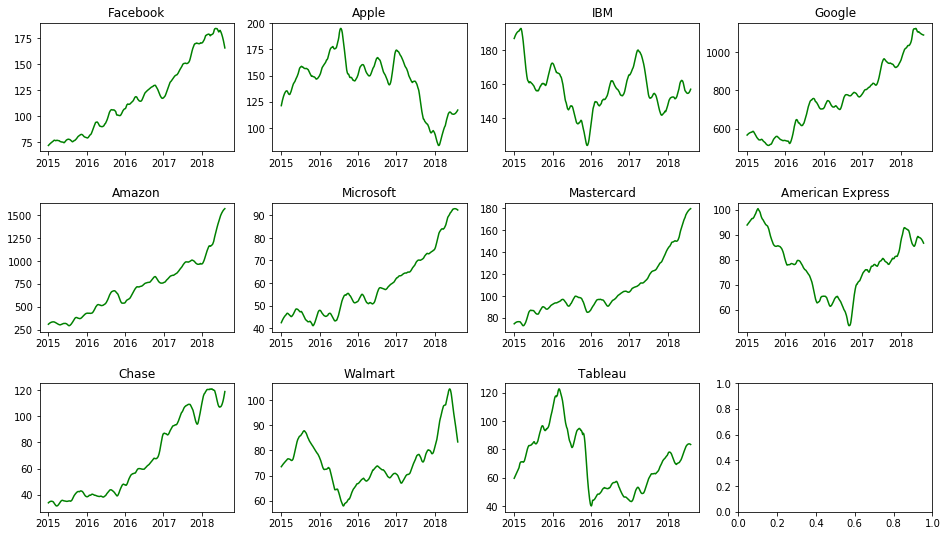

In [105]:
import numpy as np
from scipy.signal import savgol_filter

# smoothing using box filter
def smooth(y, npts_=3):
    window = np.ones(npts_) / npts_
    return np.convolve(y, window, mode='same')

# smoothing using savitzky golay filter
def savitzky_smoothing(y, win=51, pol=2):
    return savgol_filter(y, win, pol)

import matplotlib.pyplot as mb

ndates_ = np.shape(facebook_stock.index.values)[0]
x = [pd.to_datetime(str(facebook_stock.index.values[i])).strftime('%Y') for i in range(0, ndates_, ndates_//5)]

f, ax = mb.subplots(3, 4, figsize=(16,9))
# ax[0, 0].plot(facebook_stock['Close'].values, 'r-', label='Facebook')
ax[0, 0].plot(savitzky_smoothing(facebook_stock['Close'].values), 'g')
ax[0, 0].set_title('Facebook')
# ax[0, 0].legend()
ax[0, 0].set_xticklabels(x)

# ax[0, 1].plot(apple_stock['Close'].values, 'r-', label='Apple')
ax[0, 1].plot(savitzky_smoothing(apple_stock['Close'].values), 'g')
ax[0, 1].set_title('Apple')
# ax[0, 1].legend()
ax[0, 1].set_xticklabels(x)

# ax[0, 2].plot(ibm_stock['Close'].values, 'r-', label='IBM')
ax[0, 2].plot(savitzky_smoothing(ibm_stock['Close'].values), 'g')
ax[0, 2].set_title('IBM')
# ax[0, 2].legend()
ax[0, 2].set_xticklabels(x)

# ax[0, 3].plot(google_stock['Close'].values, 'r-', label='Google')
ax[0, 3].plot(savitzky_smoothing(google_stock['Close'].values), 'g')
ax[0, 3].set_title('Google')
# ax[0, 3].legend()
ax[0, 3].set_xticklabels(x)

# ax[1, 0].plot(amazon_stock['Close'].values, 'r-', label='Amazon')
ax[1, 0].plot(savitzky_smoothing(amazon_stock['Close'].values), 'g')
ax[1, 0].set_title('Amazon')
# ax[1, 0].legend()
ax[1, 0].set_xticklabels(x)

# ax[1, 1].plot(microsoft_stock['Close'].values, 'r-', label='Microsoft')
ax[1, 1].plot(savitzky_smoothing(microsoft_stock['Close'].values), 'g')
ax[1, 1].set_title('Microsoft')
# ax[1, 1].legend()
ax[1, 1].set_xticklabels(x)

# ax[1, 1].plot(microsoft_stock['Close'].values, 'r-', label='Microsoft')
ax[1, 2].plot(savitzky_smoothing(mastercard_stock['Close'].values), 'g')
ax[1, 2].set_title('Mastercard')
# ax[1, 2].legend()
ax[1, 2].set_xticklabels(x)

# ax[1, 1].plot(microsoft_stock['Close'].values, 'r-', label='Microsoft')
ax[1, 3].plot(savitzky_smoothing(americanex_stock['Close'].values), 'g')
ax[1, 3].set_title('American Express')
# ax[1, 3].legend()
ax[1, 3].set_xticklabels(x)

# ax[1, 1].plot(microsoft_stock['Close'].values, 'r-', label='Microsoft')
ax[2, 0].plot(savitzky_smoothing(chase_stock['Close'].values), 'g')
ax[2, 0].set_title('Chase')
# ax[1, 3].legend()
ax[2, 0].set_xticklabels(x)

# ax[1, 1].plot(microsoft_stock['Close'].values, 'r-', label='Microsoft')
ax[2, 1].plot(savitzky_smoothing(walmart_stock['Close'].values), 'g')
ax[2, 1].set_title('Walmart')
# ax[1, 3].legend()
ax[2, 1].set_xticklabels(x)

# ax[1, 1].plot(microsoft_stock['Close'].values, 'r-', label='Microsoft')
ax[2, 2].plot(savitzky_smoothing(tableau_stock['Close'].values), 'g')
ax[2, 2].set_title('Tableau')
# ax[1, 3].legend()
ax[2, 2].set_xticklabels(x)

f.subplots_adjust(hspace=0.4)
mb.show()

# print(facebook_stock.index.values)


## Analysis of the return rate of stocks
